In [2]:
# https://nustm.github.io/SemEval-2024_ECAC/
import json
import pandas as pd
import matplotlib.pyplot as plt
# Opening JSON file
f = open('data/Subtask_1_1_train.json')
 
# returns JSON object as 
# a dictionary
data = json.load(f)
 
# Iterating through the json
# list
#for i in data['emp_details']:
   # print(i)
 
# Closing file
f.close()

convo_tabular_data = []
for d in data:
    for utterance in d['conversation']:
        convo_tabular_data.append([d['emotion_utterance_ID'], d['emotion'],
                                   utterance['utterance_ID'],utterance['text'],
                                   utterance['speaker'], utterance['emotion']])

cause_span_data = []
for d in data:
    for cause in d['cause_spans']:
        cause_span_data.append([d['emotion_utterance_ID'], cause])

df_dia = pd.DataFrame(data = convo_tabular_data, columns = ['ID','punchline_emotion','utterance_ID','text','speaker', 'emotion'])
df_cause = pd.DataFrame(data = cause_span_data, columns = ['ID', 'cause'])

In [42]:
df_cause

,ID,cause
0,dia1utt3,1_I realize I am totally naked .
1,dia1utt3,"3_Then I look down , and I realize there is a ..."
2,dia1utt4,1_I realize I am totally naked .
3,dia1utt4,"3_Then I look down , and I realize there is a ..."
4,dia1utt4,4_Instead of ...
...,...,...
9359,dia1360utt11,10_keep having sex on a regular basis .
9360,dia1371utt1,1_that may have missed the table !
9361,dia1371utt6,1_that may have missed the table !
9362,dia1374utt2,"1_I never sucked , I actually did not want you..."


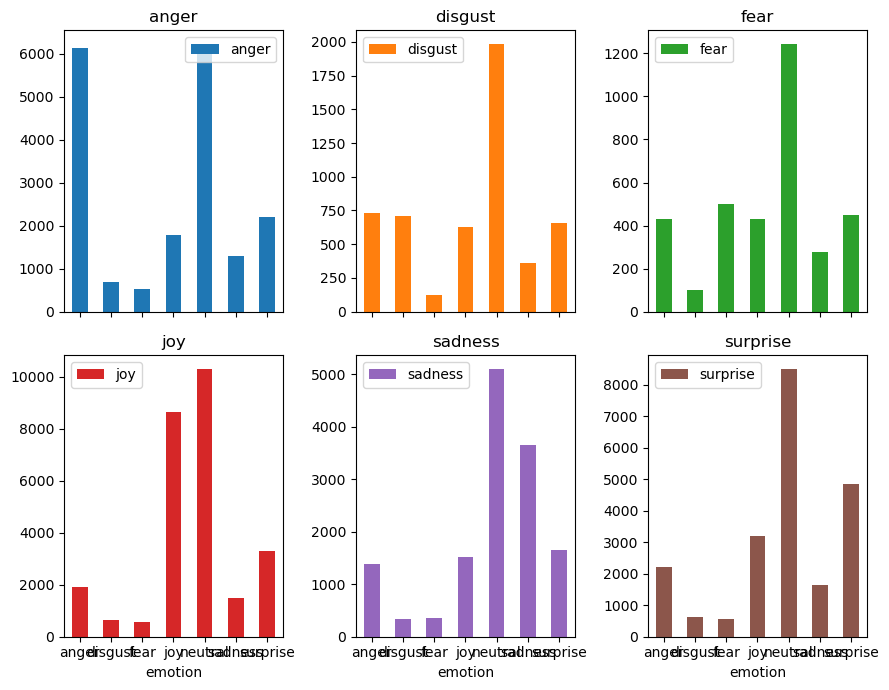

In [41]:
id_emotion = df_dia.groupby('ID')[['punchline_emotion','emotion']].value_counts().reset_index()
#emotions.groupby('labeled_emotion')
#emotions
#emotions[emotions == 1]
#emotions['labeled_emotion']
#df_dia.groupby(['ID', 'emotion']).size()
#df_dia
#print(convo_tabular_data)
emotions = df_dia.groupby('punchline_emotion')['emotion'].value_counts()
emotions.unstack(level = 0)
#emotions
ax = emotions.unstack(level = 0).plot(kind='bar', subplots=True, rot=0, figsize=(9, 7), layout=(2, 3))
plt.tight_layout()

In [95]:
df_dia.groupby('ID')['emotion'].unique() # .value_counts()

AttributeError: 'DataFrameGroupBy' object has no attribute 'unique'

In [8]:
#df_dia[df_dia['speaker'] == 'Joey/Drake']['text']
df_dia['speaker'].unique()

array(['Chandler', 'All', 'Joey', 'Phoebe', 'Ross', 'Monica', 'Paul',
       'Rachel', 'Mrs. Geller', 'Mr. Geller', 'Susan', 'Carol', 'Barry',
       'Robbie', 'Paula', 'Kiki', 'Joanne', 'Pizza Guy',
       'Monica and Phoebe', 'Both', 'Receptionist', 'Kid', 'Janice',
       'Woman', 'Angela', 'Bob', 'Director', 'Jill', 'Shelley',
       'Aunt Lillian', 'Jay Leno', 'Paolo', 'Customer',
       'Joey and Chandler', 'Guys', 'Mr. Tribbiani', 'Ronni',
       'Mrs. Tribbiani', 'Roger', 'Lorraine', 'Kristin',
       'Rachel and Phoebe', 'Fireman No. 1', 'Fireman No. 2',
       'Fireman No. 3', 'Mrs. Tedlock', 'Joey and Ross', 'Bernice',
       'Bobby', 'Mindy', 'Teacher', 'Dr. Baldhara', 'Fake Monica',
       'Young Ethan', 'Gerston', 'Santos', 'Petrie', 'Lydia', 'Nurse',
       'Guy', 'Dr. Franzblau', 'Janitor', 'Flight Attendant', 'Man',
       'Carl', 'Julie', 'Annabelle', 'Hombre Man', 'Mr. Heckles',
       'Mr. Treeger', 'Stranger', 'Duncan', 'Jade', 'Steve', 'Terry',
       'Chandler an

In [68]:
for i in range(5):
    convo = data[i]['conversation']
    
    print(data[i])
    print()
    print(data[i]['cause_spans'])
    print()




{'emotion_utterance_ID': 'dia1utt3', 'emotion': 'surprise', 'conversation': [{'utterance_ID': 1, 'text': 'Alright , so I am back in high school , I am standing in the middle of the cafeteria , and I realize I am totally naked .', 'speaker': 'Chandler', 'emotion': 'neutral'}, {'utterance_ID': 2, 'text': 'Oh , yeah . Had that dream .', 'speaker': 'All', 'emotion': 'neutral'}, {'utterance_ID': 3, 'text': 'Then I look down , and I realize there is a phone ... there .', 'speaker': 'Chandler', 'emotion': 'surprise'}, {'utterance_ID': 4, 'text': 'Instead of ... ?', 'speaker': 'Joey', 'emotion': 'surprise'}, {'utterance_ID': 5, 'text': 'That is right .', 'speaker': 'Chandler', 'emotion': 'anger'}, {'utterance_ID': 6, 'text': 'Never had that dream .', 'speaker': 'Joey', 'emotion': 'neutral'}, {'utterance_ID': 7, 'text': 'No .', 'speaker': 'Phoebe', 'emotion': 'neutral'}, {'utterance_ID': 8, 'text': 'All of a sudden , the phone starts to ring .', 'speaker': 'Chandler', 'emotion': 'neutral'}], 'c

In [63]:
# init an empty list of all the utterances of this conversation
u = []
# for each dictionary in the conversation put all the data into the Utterance class
for d in data[0]['conversation']:
    # add newly created class to the empty list of utterances 
    utter = Utterance(d['utterance_ID'],d['text'],d['speaker'],d['emotion'])
    utter.set_vector()
    u.append(utter)

# demonstrate some functionality
for step in u:
    print(step.get_text())
    print(step.get_vector())
    print()



Alright , so I am back in high school , I am standing in the middle of the cafeteria , and I realize I am totally naked .
{'Alright': 1, ',': 3, 'so': 1, 'I': 4, 'am': 3, 'back': 1, 'in': 2, 'high': 1, 'school': 1, 'standing': 1, 'the': 2, 'middle': 1, 'of': 1, 'cafeteria': 1, 'and': 1, 'realize': 1, 'totally': 1, 'naked': 1, '.': 1}

Oh , yeah . Had that dream .
{'Oh': 1, ',': 1, 'yeah': 1, '.': 2, 'Had': 1, 'that': 1, 'dream': 1}

Then I look down , and I realize there is a phone ... there .
{'Then': 1, 'I': 2, 'look': 1, 'down': 1, ',': 1, 'and': 1, 'realize': 1, 'there': 2, 'is': 1, 'a': 1, 'phone': 1, '...': 1, '.': 1}

Instead of ... ?
{'Instead': 1, 'of': 1, '...': 1, '?': 1}

That is right .
{'That': 1, 'is': 1, 'right': 1, '.': 1}

Never had that dream .
{'Never': 1, 'had': 1, 'that': 1, 'dream': 1, '.': 1}

No .
{'No': 1, '.': 1}

All of a sudden , the phone starts to ring .
{'All': 1, 'of': 1, 'a': 1, 'sudden': 1, ',': 1, 'the': 1, 'phone': 1, 'starts': 1, 'to': 1, 'ring': 1

In [61]:
class EmotionUtterance:
    def __init(self,id, target_emotion, conversation, cause_spans):
        self.id = id
        self.target_emotion = target_emotion
        self.conversation = conversation
        self.cause_spans = cause_spans





class CasueSpan:
    def __init__(self,text):
        self.text = text
        self.vector = None
        
        def get_text(self):
            return self.text
        def get_vector(self):
            return self.vector
    
        def set_vector(self):
            a = self.text.split()
            self.vector = dict(zip(a,[a.count(i) for i in a]))
            

class Utterance:
    def __init__(self, id, text, speaker, emotion):
        self.id = id
        self.text = text
        self.speaker = speaker
        self.emotion = emotion
        self.vector = None

    def get_id(self):
        return self.id
    def get_text(self):
        return self.text
    def get_speaker(self):
        return self.speaker
    def get_emotion(self):
        return self.emotion
    def get_vector(self):
        return self.vector
    
    def set_vector(self):
        a = self.text.split()
        self.vector = dict(zip(a,[a.count(i) for i in a]))
    
    


    